` HEART DISEASES PREDICTION APP`

In [1]:
# Load your libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

* collect data 

In [2]:
# load your data
data = pd.read_csv('heart dataset.csv')


In [3]:
# cheak your data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


* Preprocessing and Data cleaning

In [4]:
# check data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# check for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# check for duplicates
data.duplicated().sum()

np.int64(723)

* EXPLORATORY DATA ANALYSIS (EDA)

In [7]:
# perform statistical analysis
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


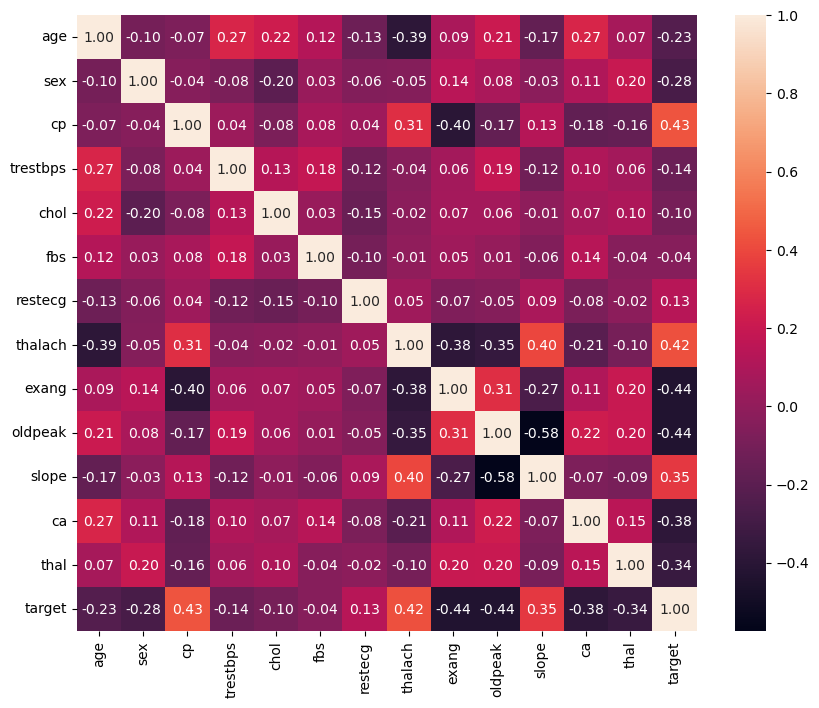

In [8]:
# check data correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

* feature engineering

In [9]:
# load cleaned transformed data
df = pd.read_csv('heart diseases data.csv')

In [10]:
# check the data
df.head()

,age,chest pain,heart pain,exercise pain,oldpeak,number of blood vessels,blood disorder,target
0,52,heart related pain,168,no angina,1.0,2,reversable defect,0
1,53,heart related pain,155,present angina,3.1,0,reversable defect,0
2,70,heart related pain,125,present angina,2.6,0,reversable defect,0
3,61,heart related pain,161,no angina,0.0,1,reversable defect,0
4,62,heart related pain,106,no angina,1.9,3,fixed defect,0


In [11]:
# select features for training
X = df.drop('target', axis=1)
y = df['target'].values

In [12]:
print(X.columns)

Index(['age', 'chest pain', 'heart pain', 'exercise pain', 'oldpeak',
       'number of blood vessels', 'blood disorder'],
      dtype='object')


In [13]:
print(y)

[0 0 0 ... 0 1 0]


* TRAIN-TEST SPLIT

In [14]:
# split the data training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# print their respective shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (820, 7) (820,)
Testing set shape: (205, 7) (205,)


In [16]:
# implement Random Forest classifier
Dt = DecisionTreeClassifier()
Dt

DecisionTreeClassifier()

In [17]:
# Build a pipeline: preprocess + classifier
pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), ['chest pain', 'exercise pain', 'blood disorder']),
            ('num', 'passthrough', ['age', 'heart pain', 'oldpeak', 'number of blood vessels'])
        ]
    ),
    DecisionTreeClassifier()
)

In [18]:
#check pipeline design
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['chest pain',
                                                   'exercise pain',
                                                   'blood disorder']),
                                                 ('num', 'passthrough',
                                                  ['age', 'heart pain',
                                                   'oldpeak',
                                                   'number of blood '
                                                   'vessels'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [19]:
# fit data into pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['chest pain',
                                                   'exercise pain',
                                                   'blood disorder']),
                                                 ('num', 'passthrough',
                                                  ['age', 'heart pain',
                                                   'oldpeak',
                                                   'number of blood '
                                                   'vessels'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [20]:
# prediction on the test set
y_pred = pipeline.predict(X_test)

In [21]:
# check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 98.53658536585365


In [22]:
# save the model to a file using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)
